# Fiddling about with a ThAr spectrum v[1.1]
    v1.0 -- JXP starts with a good line list (not a complete one)
    v1.1 -- JXP uses RC's new complete list (ThAr_allfitted.dat)

In [1]:
%matplotlib notebook

In [2]:
# imports
from imp import reload
import numpy as np
from matplotlib import pyplot as plt

from scipy.interpolate import interp1d

from astropy.table import Table

from arclines.holy import utils as arch_utils
from arclines.holy import patterns as arch_patt

### Ryan's head start
    dispersion = 0.0207737, but varies from 0.01513672-0.02539062

## Load spectrum

In [3]:
spec = Table.read('ThAr_order.dat', format='ascii')

In [4]:
spec[0:5]

Amp,Mask
float64,float64
123.699002208,0.0
146.297296666,0.0
144.898493366,0.0
139.902062285,0.0
134.507523664,0.0


In [5]:
npix = len(spec)
npix

4608

### Plot

<IPython.core.display.Javascript object>


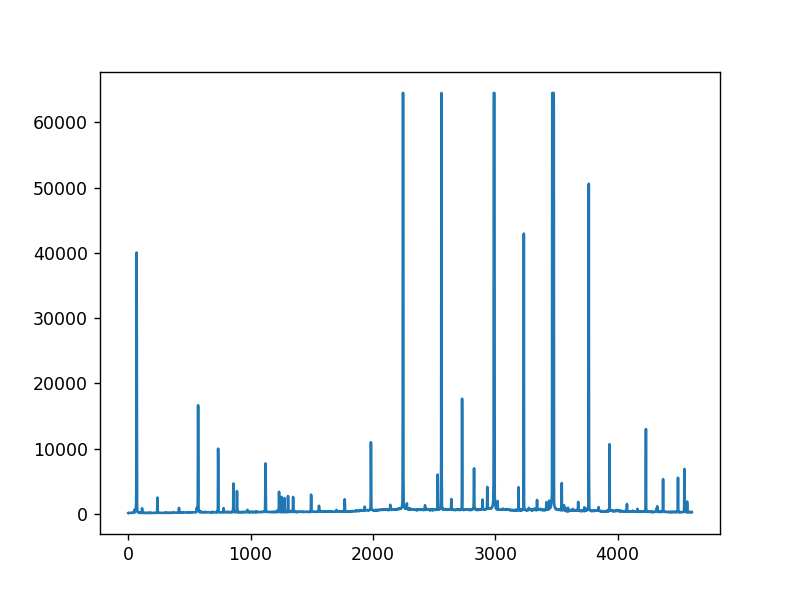

In [6]:
plt.clf()
ax = plt.gca()
ax.plot(spec['Amp'])
plt.show()

## Find lines

In [7]:
min_ampl = 500.

In [8]:
all_tcent, cut_tcent, icut = arch_utils.arc_lines_from_spec(spec['Amp'], min_ampl=min_ampl)

In [9]:
cut_tcent

array([   68.99142359,   113.48331851,   239.37516074,   415.3317666 ,
         561.32906692,   571.4645097 ,   735.24455602,   780.23724842,
         860.25902988,   889.1886349 ,  1122.02057338,  1233.21023743,
        1254.7408401 ,  1276.79906003,  1306.53440798,  1347.87368539,
        1495.30609497,  1559.73518558,  1770.19471548,  1933.19923538,
        1984.32214665,  2142.13108391,  2246.98274251,  2277.74515521,
        2426.21385446,  2529.88725955,  2560.32290983,  2640.91841529,
        2729.05229192,  2826.81866458,  2896.04982037,  2935.71643307,
        2990.36535694,  2991.85466797,  3019.11399274,  3190.94510642,
        3233.73309295,  3341.9039537 ,  3441.02536686,  3476.84564742,
        3543.86343013,  3562.84813516,  3677.80619477,  3764.9293156 ,
        3934.17396581,  4076.70413285,  4231.68877775,  4323.93317141,
        4371.71976891,  4493.72616805,  4546.24674055,  4568.41314314])

## Line list
    wave_no is in Vacuum
    wavelength is in Air

In [10]:
# Original
orig_thar = Table.read('arclist.ThAr', format='ascii')
orig_thar[0:5]

Wave_no.,wave,log(I),Elm,ion,Reference
float64,float64,float64,str2,str3,str1
33322.4046,3000.109256,0.45,Ar,II,W
33319.9704,3000.328442,-0.007,XX,0,P
33318.6726,3000.44531,1.22,Ar,II,W
33313.404,3000.919858,0.297,Th,II,P
33312.8136,3000.973041,0.026,XX,0,P


In [11]:
# New
thar = Table.read('ThAr_allfitted.dat', format='ascii')

In [13]:
wvdata = thar['wave'].data
wvdata[0:3]

array([ 3007.98872706,  3009.25940198,  3009.99183094])

## Start guessing

In [14]:
best_dict = dict(nmatch=0, ibest=-1, bwv=0., min_ampl=min_ampl)

In [15]:
pix_tol = 1.

In [16]:
disp = 0.0207737  # Ang

In [17]:
wv_cen = 5000.

In [18]:
reload(arch_patt)
arch_patt.scan_for_matches(wv_cen, disp, npix, cut_tcent, wvdata,
                                      best_dict=best_dict, pix_tol=pix_tol, 
                           swv_uncertainty=10.,wvoff=100.)
best_dict

{'IDs': [0.0,
  0.0,
  0.0,
  0.0,
  4965.7297186655569,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  4979.3239058430172,
  4980.9425952179508,
  0.0,
  4990.0198278453372,
  4991.2053814187411,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'ampl': None,
 'bwv': 5004.0,
 'ibest': 13,
 'mask': array([False, False, False, False,  True, False, False, False, False,
        False, False, False, False, False, False, False,  True,  True,
        False,  True,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False], dtype=bool),
 'midx': {0: {'matches': [1673, 1673, 1671, 1673]},
  1: {'matches': [1674

## Loop me

In [19]:
wvcens = np.arange(4500., 8000., 100)
wvcens

array([ 4500.,  4600.,  4700.,  4800.,  4900.,  5000.,  5100.,  5200.,
        5300.,  5400.,  5500.,  5600.,  5700.,  5800.,  5900.,  6000.,
        6100.,  6200.,  6300.,  6400.,  6500.,  6600.,  6700.,  6800.,
        6900.,  7000.,  7100.,  7200.,  7300.,  7400.,  7500.,  7600.,
        7700.,  7800.,  7900.])

In [20]:
best_dict = dict(nmatch=0, ibest=-1, bwv=0., min_ampl=min_ampl)
for iwvcen in wvcens:
    print("Working on wvcen={:f}".format(iwvcen))
    arch_patt.scan_for_matches(iwvcen, disp, npix, cut_tcent, wvdata,
                                      best_dict=best_dict, pix_tol=pix_tol, 
                           swv_uncertainty=10.,wvoff=100.)
    print("Nmatch = {:d}".format(best_dict['nmatch']))

Working on wvcen=4500.000000
Nmatch = 5
Working on wvcen=4600.000000
Nmatch = 6
Working on wvcen=4700.000000
Nmatch = 6
Working on wvcen=4800.000000
Nmatch = 6
Working on wvcen=4900.000000
Nmatch = 6
Working on wvcen=5000.000000
Nmatch = 6
Working on wvcen=5100.000000
Nmatch = 6
Working on wvcen=5200.000000
Nmatch = 6
Working on wvcen=5300.000000
Nmatch = 6
Working on wvcen=5400.000000
Nmatch = 6
Working on wvcen=5500.000000
Nmatch = 7
Working on wvcen=5600.000000
Nmatch = 7
Working on wvcen=5700.000000
Nmatch = 7
Working on wvcen=5800.000000
Nmatch = 7
Working on wvcen=5900.000000
Nmatch = 7
Working on wvcen=6000.000000
Nmatch = 7
Working on wvcen=6100.000000
Nmatch = 7
Working on wvcen=6200.000000
Nmatch = 7
Working on wvcen=6300.000000
Nmatch = 7
Working on wvcen=6400.000000
Nmatch = 7
Working on wvcen=6500.000000
Nmatch = 7
Working on wvcen=6600.000000
Nmatch = 7
Working on wvcen=6700.000000
Nmatch = 7
Working on wvcen=6800.000000
Nmatch = 7
Working on wvcen=6900.000000
Nmatch = 7


In [21]:
best_dict['bwv']

5480.0

## Refine?!

In [22]:
pix_tol = 1.
best_dict = dict(nmatch=0, ibest=-1, bwv=0., min_ampl=min_ampl)
arch_patt.scan_for_matches(5200., disp, npix, cut_tcent, wvdata,
                                      best_dict=best_dict, pix_tol=pix_tol, 
                           swv_uncertainty=10.,wvoff=100.)
best_dict['nmatch']

5

In [23]:
best_dict['scores']

array(['Amb', 'Amb', 'Amb', 'Amb', 'Amb', 'Amb', 'Amb', 'Amb', 'Amb',
       'Amb', 'Amb', 'None', 'None', 'None', 'Amb', 'Amb', 'Amb', 'Amb',
       'Amb', 'Amb', 'Amb', 'Amb', 'Amb', 'Amb', 'Risk', 'Amb', 'None',
       'None', 'None', 'None', 'None', 'None', 'None', 'None', 'Perf',
       'Perf', 'Perf', 'Perf', 'Perf', 'Amb', 'None', 'Amb', 'Amb', 'Amb',
       'Amb', 'Amb', 'Amb', 'Amb', 'None', 'None', 'None', 'None'], 
      dtype='<U4')

In [24]:
best_dict['bwv']

5252.0

## RC tells me central wavelength is close to 6000A
    Have cheated.  Answer is ~6060A

In [25]:
pix_tol = 2.
best_dict = dict(nmatch=0, ibest=-1, bwv=0., min_ampl=min_ampl)
arch_patt.scan_for_matches(6060., disp, npix, cut_tcent, wvdata,
                                      best_dict=best_dict, pix_tol=pix_tol, 
                           swv_uncertainty=10.,wvoff=10.)
best_dict['nmatch']

1

In [26]:
best_dict['scores']

array(['Amb', 'Amb', 'Amb', 'Amb', 'Amb', 'None', 'Amb', 'None', 'None',
       'None', 'None', 'None', 'None', 'None', 'None', 'Amb', 'Amb', 'Amb',
       'Good', 'Amb', 'Amb', 'Amb', 'Amb', 'Amb', 'Amb', 'Amb', 'Amb',
       'None', 'Amb', 'Amb', 'Amb', 'None', 'None', 'None', 'None', 'None',
       'None', 'None', 'None', 'None', 'None', 'None', 'None', 'Amb',
       'Risk', 'None', 'Risk', 'Risk', 'Amb', 'None', 'None', 'None'], 
      dtype='<U4')

In [27]:
IDs = np.array(best_dict['IDs'])

In [28]:
gd =  IDs > 0.

In [29]:
cut_tcent[gd], IDs[gd]

(array([ 1770.19471548]), array([ 6051.75747427]))

In [30]:
best_dict['bwv']

6058.0

## Faux line list

In [31]:
soln = Table.read('solution.dat', format='ascii')
soln[0:5]

true_wv
float64
6005.85253906
6005.87792969
6005.90380859
6005.92919922
6005.95507812


In [32]:
fsoln = interp1d(np.arange(npix), soln['true_wv'], kind='cubic')

In [33]:
cheat_list = fsoln(cut_tcent)

In [34]:
cheat_list

array([ 6007.6164788 ,  6008.75011468,  6011.94050416,  6016.35591702,
        6019.97875405,  6020.22863004,  6024.24322835,  6025.33772724,
        6027.27373271,  6027.97081628,  6033.51903353,  6036.12939578,
        6036.63208576,  6037.14621632,  6037.83696709,  6038.79443081,
        6042.17981642,  6043.64438261,  6048.36516885,  6051.952637  ,
        6053.06516403,  6056.4618218 ,  6058.68664382,  6059.33395691,
        6062.42923925,  6064.55924001,  6065.17952081,  6066.81133103,
        6068.57819992,  6070.51545733,  6071.87353165,  6072.64636467,
        6073.70438663,  6073.73305075,  6074.25801114,  6077.52436082,
        6078.32661461,  6080.33317145,  6082.14597433,  6082.79506297,
        6084.00051509,  6084.34000328,  6086.37549951,  6087.89526262,
        6090.79195958,  6093.17282992,  6095.70103988,  6097.17569417,
        6097.93055817,  6099.8297229 ,  6100.63512803,  6100.97254826])

In [35]:
pix_tol = 1.
best_dict = dict(nmatch=0, ibest=-1, bwv=0., min_ampl=min_ampl)
arch_patt.scan_for_matches(6060., disp, npix, cut_tcent, cheat_list,
                                      best_dict=best_dict, pix_tol=pix_tol, 
                           swv_uncertainty=10.,wvoff=10.)

In [36]:
best_dict['nmatch']

41

In [109]:
best_dict['scores']

array(['None', 'None', 'Good', 'Perf', 'Perf', 'Perf', 'Perf', 'Perf',
       'Perf', 'Perf', 'Perf', 'Perf', 'Perf', 'Perf', 'Perf', 'Perf',
       'Perf', 'Perf', 'Amb', 'Perf', 'Perf', 'Perf', 'Perf', 'Perf',
       'Perf', 'Perf', 'Perf', 'Perf', 'Perf', 'Perf', 'Good', 'Perf',
       'Good', 'Good', 'Good', 'Perf', 'Perf', 'Perf', 'Perf', 'Perf',
       'Perf', 'Perf', 'Good', 'Amb', 'Good', 'None', 'Amb', 'Risk',
       'None', 'None', 'None', 'None'], 
      dtype='<U4')

## Compare cheat to allfitted

In [37]:
for cheat in cheat_list:
    imin = np.argmin(np.abs(cheat-wvdata))
    print("Cheat={:f}, allfitted={:f}, diff={:f}".format(cheat, wvdata[imin], cheat-wvdata[imin]))

Cheat=6007.616479, allfitted=6007.070557, diff=0.545921
Cheat=6008.750115, allfitted=6009.139804, diff=-0.389690
Cheat=6011.940504, allfitted=6011.344978, diff=0.595527
Cheat=6016.355917, allfitted=6016.356192, diff=-0.000275
Cheat=6019.978754, allfitted=6018.991382, diff=0.987372
Cheat=6020.228630, allfitted=6018.991382, diff=1.237248
Cheat=6024.243228, allfitted=6024.141853, diff=0.101375
Cheat=6025.337727, allfitted=6025.777601, diff=-0.439874
Cheat=6027.273733, allfitted=6027.242915, diff=0.030818
Cheat=6027.970816, allfitted=6027.242915, diff=0.727901
Cheat=6033.519034, allfitted=6031.875238, diff=1.643796
Cheat=6036.129396, allfitted=6035.183836, diff=0.945559
Cheat=6036.632086, allfitted=6037.690065, diff=-1.057979
Cheat=6037.146216, allfitted=6037.690065, diff=-0.543849
Cheat=6037.836967, allfitted=6037.690065, diff=0.146902
Cheat=6038.794431, allfitted=6038.670633, diff=0.123798
Cheat=6042.179816, allfitted=6041.604028, diff=0.575789
Cheat=6043.644383, allfitted=6044.432300, d